In [ ]:
import pandas as pd
df=pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [ ]:
# Fill missing values with the mode of the column
df['Division Name'] = df['Division Name'].fillna(df['Division Name'].mode()[0])
df['Department Name'] = df['Department Name'].fillna(df['Department Name'].mode()[0])
df['Class Name'] = df['Class Name'].fillna(df['Class Name'].mode()[0])
df.isna().sum()

,0
Unnamed: 0,0
Clothing ID,0
Age,0
Title,3810
Review Text,845
Rating,0
Recommended IND,0
Positive Feedback Count,0
Division Name,0
Department Name,0


In [ ]:
df['Review Text'][23481]

"I was very happy to snag this dress at such a great price! it's very easy to slip on and has a very flattering cut and color combo."

In [ ]:
#TEXT PRE PROCESSING

In [ ]:
df1=df[['Title', 'Review Text']]

In [ ]:
df1

,Title,Review Text
0,NaN,Absolutely wonderful - silky and sexy and comf...
1,NaN,Love this dress! it's sooo pretty. i happene...
2,Some major design flaws,I had such high hopes for this dress and reall...
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl..."
4,Flattering shirt,This shirt is very flattering to all due to th...
...,...,...
23481,Great dress for many occasions,I was very happy to snag this dress at such a ...
23482,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre..."
23483,"Cute, but see through","This fit well, but the top was very see throug..."
23484,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import  PorterStemmer, WordNetLemmatizer

In [ ]:
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))
def pre_procesing(text):
    text = text.lower()
    tokens = word_tokenize(text)
    #tokens = [lemmatizer.lemmatize(word) for word in tokens]
    tokens = [stemmer.stem(lemmatizer.lemmatize(word)) for word in tokens]
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def pre_procesing(text):
    if isinstance(text, str):  # Check if the text is a string
        text = text.lower()  # Convert to lowercase
        tokens = word_tokenize(text)  # Tokenize the text
        # Remove stop words and lemmatize
        tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
        return ' '.join(tokens)  # Return the preprocessed text as a string
    else:
        return ''  # Return empty string if the text is not a string (e.g., NaN)

# Apply preprocessing to the 'Review Text' column
df['Review Text'] = df['Review Text'].apply(pre_procesing)


In [ ]:
import string

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
punctuations = set(string.punctuation)  # Set of punctuation marks, including apostrophes

def pre_processing(text):
    if isinstance(text, str):  # Check if the text is a string
        text = text.lower()  # Convert to lowercase
        text = text.replace("'", "")  # Remove apostrophes specifically
        tokens = word_tokenize(text)  # Tokenize the text
        # Remove stop words, punctuation, and lemmatize
        tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and word not in punctuations]
        return ' '.join(tokens)  # Return the preprocessed text as a string
    else:
        return ''  # Return empty string if the text is not a string (e.g., NaN)

# Apply preprocessing to the 'Review Text' column
df['Review Text'] = df['Review Text'].apply(pre_processing)


In [ ]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
punctuations = set(string.punctuation)  # Set of punctuation marks, including apostrophes

def pre_processing(text):
    if isinstance(text, str):  # Check if the text is a string
        text = text.lower()  # Convert to lowercase
        text = text.replace("'", "")  # Remove apostrophes specifically
        tokens = word_tokenize(text)  # Tokenize the text
        # Remove stop words, punctuation, and lemmatize
        tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and word not in punctuations]
        return ' '.join(tokens)  # Return the preprocessed text as a string
    else:
        return ''  # Return empty string if the text is not a string (e.g., NaN)

# Apply preprocessing to the 'Review Text' column
df['Title'] = df['Title'].apply(pre_processing)


In [ ]:
df['Title'][2]

'major design flaw'

In [ ]:
df['Review Text'][50]

'cute top transition easily summer fall fit well nice print comfortable tried store purchase color washed best color blonde would look much better brunette different color likely would purchased'

In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
Clothing ID,0
Age,0
Title,0
Review Text,0
Rating,0
Recommended IND,0
Positive Feedback Count,0
Division Name,0
Department Name,0


In [ ]:
#WORD CLOUD

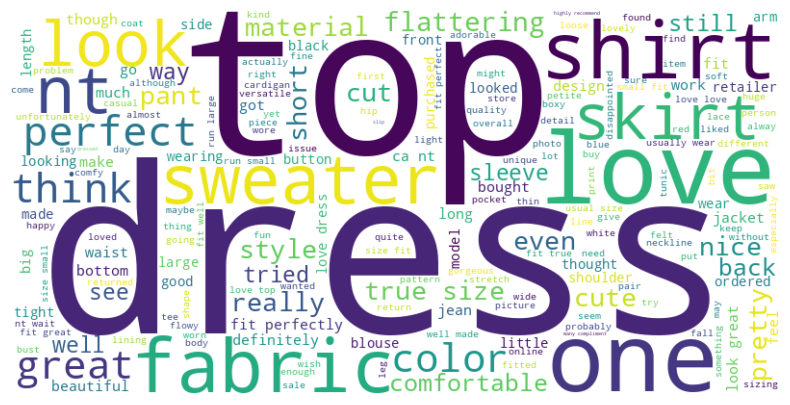

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all review text into one long string
text = " ".join(review for review in df['Review Text'].astype(str))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()


In [ ]:
df['Sentiment']=df['Rating'].apply(lambda x: 'positive' if x>3 else 'negative')
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Sentiment
0,0,767,33,,absolutely wonderful silky sexy comfortable,4,1,0,Initmates,Intimate,Intimates,positive
1,1,1080,34,,love dress sooo pretty happened find store gla...,5,1,4,General,Dresses,Dresses,positive
2,2,1077,60,major design flaw,high hope dress really wanted work initially o...,3,0,0,General,Dresses,Dresses,negative
3,3,1049,50,favorite buy,love love love jumpsuit fun flirty fabulous ev...,5,1,0,General Petite,Bottoms,Pants,positive
4,4,847,47,flattering shirt,shirt flattering due adjustable front tie perf...,5,1,6,General,Tops,Blouses,positive
...,...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,great dress many occasion,happy snag dress great price easy slip flatter...,5,1,0,General Petite,Dresses,Dresses,positive
23482,23482,862,48,wish made cotton,reminds maternity clothes soft stretchy shiny ...,3,1,0,General Petite,Tops,Knits,negative
23483,23483,1104,31,cute see,fit well top see never would worked glad able ...,3,0,1,General Petite,Dresses,Dresses,negative
23484,23484,1084,28,cute dress perfect summer party,bought dress wedding summer cute unfortunately...,3,1,2,General,Dresses,Dresses,negative


In [ ]:
df['Sentiment'].value_counts()

,count
Sentiment,
positive,18208
negative,5278


In [ ]:
df['Rating'].value_counts()

,count
Rating,
5,13131
4,5077
3,2871
2,1565
1,842


In [ ]:
df['Rating'].isna().sum()

0

In [ ]:
df['Sentiment'].isna().sum()

0

In [ ]:
df=df[['Review Text','Sentiment']]
df

,Review Text,Sentiment
0,absolutely wonderful silky sexy comfortable,positive
1,love dress sooo pretty happened find store gla...,positive
2,high hope dress really wanted work initially o...,negative
3,love love love jumpsuit fun flirty fabulous ev...,positive
4,shirt flattering due adjustable front tie perf...,positive
...,...,...
23481,happy snag dress great price easy slip flatter...,positive
23482,reminds maternity clothes soft stretchy shiny ...,negative
23483,fit well top see never would worked glad able ...,negative
23484,bought dress wedding summer cute unfortunately...,negative


In [ ]:
df.isna().sum()


,0
Review Text,0
Sentiment,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review Text  23486 non-null  object
 1   Sentiment    23486 non-null  object
dtypes: object(2)
memory usage: 367.1+ KB


In [ ]:
df['Sentiment'].mode()

,Sentiment
0,positive


LOGISTIC REGRESSION


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import joblib
# 1. Split the data first (to avoid any leakage)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df['Review Text'], df['Sentiment'], test_size=0.2, random_state=42)

# 2. Apply TF-IDF to the training set only, then transform the test set
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit on the training set and transform both sets
X_train = tfidf_vectorizer.fit_transform(X_train_raw)
X_test = tfidf_vectorizer.transform(X_test_raw)

# 3. Train the Logistic Regression model using class weights
class_weights = {'negative': len(y_train) / (2 * y_train.value_counts()['negative']),
                 'positive': len(y_train) / (2 * y_train.value_counts()['positive'])}

log_reg = LogisticRegression(max_iter=1000, class_weight=class_weights)
log_reg.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred = log_reg.predict(X_test)

# 5. Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
  # Save the correct model
joblib.dump(log_reg, 'logistic_regression_model.joblib')

Accuracy: 0.8537675606641124
Classification Report:
               precision    recall  f1-score   support

    negative       0.65      0.80      0.72      1090
    positive       0.93      0.87      0.90      3608

    accuracy                           0.85      4698
   macro avg       0.79      0.83      0.81      4698
weighted avg       0.87      0.85      0.86      4698



['logistic_regression_model.joblib']

LOGISTIC REGRESSION WITH GRID SEARCH

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
import joblib
# Assuming df is your DataFrame containing 'Review Text' and 'Sentiment'

# 1. Encode labels to numeric values
df['Sentiment'] = df['Sentiment'].map({'positive': 1, 'negative': 0})

# 2. Split the data first (to avoid any leakage)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df['Review Text'], df['Sentiment'], test_size=0.2, random_state=42)

# 3. Apply TF-IDF to the training set only, then transform the test set
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit on the training set and transform both sets
X_train = tfidf_vectorizer.fit_transform(X_train_raw)
X_test = tfidf_vectorizer.transform(X_test_raw)

# 4. Set up class weights
class_weights = {
    0: len(y_train) / (2 * (y_train == 0).sum()),  # For 'negative' (mapped to 0)
    1: len(y_train) / (2 * (y_train == 1).sum())   # For 'positive' (mapped to 1)
}

# 5. Create a Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, class_weight=class_weights)

# 6. Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Type of regularization
    'solver': ['liblinear', 'saga']  # Solvers that support l1 and elasticnet penalties
}

# 7. Set up the Grid Search
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)

# 8. Fit the model
grid_search.fit(X_train, y_train)

# 9. Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# 10. Make predictions with the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 11. Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


<ipython-input-75-236cfd3dd383>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = df['Sentiment'].map({'positive': 1, 'negative': 0})


KeyboardInterrupt: 

RANDOM FOREST WITH TFIDF VECTOR

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# 1. Split the data first (to avoid any leakage)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df['Review Text'], df['Sentiment'], test_size=0.2, random_state=42)

# 2. Apply TF-IDF to the training set only, then transform the test set
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit on the training set and transform both sets
X_train = tfidf_vectorizer.fit_transform(X_train_raw)
X_test = tfidf_vectorizer.transform(X_test_raw)

# 3. Train the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_classifier.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# 5. Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8409961685823755
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.38      0.53      1090
           1       0.84      0.98      0.90      3608

    accuracy                           0.84      4698
   macro avg       0.84      0.68      0.72      4698
weighted avg       0.84      0.84      0.82      4698



SMOTE FOR BALANCING

In [ ]:
pip install imbalanced-learn


In [ ]:
df['Sentiment'].value_counts()

,count
Sentiment,
positive,18208
negative,5278


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# 1. Split the data into training and testing sets
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df['Review Text'], df['Sentiment'], test_size=0.2, random_state=42)

# 2. Apply TF-IDF to the training set only, then transform the test set
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train = tfidf_vectorizer.fit_transform(X_train_raw)
X_test = tfidf_vectorizer.transform(X_test_raw)

# 3. Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 4. Train the Logistic Regression model (no need for class weights with SMOTE)
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_resampled, y_train_resampled)

# 5. Make predictions on the test set
y_pred = log_reg.predict(X_test)

# 6. Evaluate the model (classification report and accuracy)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8452532992762878
Classification Report:
               precision    recall  f1-score   support

    negative       0.64      0.74      0.69      1090
    positive       0.92      0.88      0.90      3608

    accuracy                           0.85      4698
   macro avg       0.78      0.81      0.79      4698
weighted avg       0.86      0.85      0.85      4698



In [ ]:
#WORD VECTOR WITH ML

In [ ]:
#!pip install gensim


from gensim.models import keyedvectors

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import  PorterStemmer, WordNetLemmatizer

# Download necessary resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#Pre PRocessing

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def pre_procesing(text):
    text = text.lower()
    tokens = word_tokenize(text)
    #tokens = [lemmatizer.lemmatize(word) for word in tokens]
    tokens = [stemmer.stem(lemmatizer.lemmatize(word)) for word in tokens]
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

WORD TO VECTOR

In [ ]:
pip install gensim


In [ ]:
from gensim.downloader import load

# Load a pre-trained word2vec model (Google's Word2Vec, for example)
word2vec_model = load("word2vec-google-news-300")



[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
len(df['Review Text'][1])

185

In [ ]:
df

,Review Text,Sentiment
0,absolutely wonderful silky sexy comfortable,1
1,love dress sooo pretty happened find store gla...,1
2,high hope dress really wanted work initially o...,0
3,love love love jumpsuit fun flirty fabulous ev...,1
4,shirt flattering due adjustable front tie perf...,1
...,...,...
23481,happy snag dress great price easy slip flatter...,1
23482,reminds maternity clothes soft stretchy shiny ...,0
23483,fit well top see never would worked glad able ...,0
23484,bought dress wedding summer cute unfortunately...,0


In [ ]:
df['Sentiment'].value_counts()

,count
Sentiment,
1,18208
0,5278


In [ ]:
# Fill missing values with the mode of the column
df['Division Name'] = df['Division Name'].fillna(df['Division Name'].mode()[0])
df['Department Name'] = df['Department Name'].fillna(df['Department Name'].mode()[0])
df['Class Name'] = df['Class Name'].fillna(df['Class Name'].mode()[0])
df.isna().sum()

KeyError: 'Division Name'

LOGISTIC REGRESSION WITH WORD 2 VECTOR WITH SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from gensim.models import Word2Vec
import numpy as np

# Assuming df is your DataFrame containing 'Review Text' and 'Sentiment'
# Set up the reviews and labels
reviews = df['Review Text'].values
labels = df['Sentiment'].values

# Tokenize the reviews for Word2Vec
tokenized_reviews = [review.split() for review in reviews]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)

# Create function to convert reviews to vectors
def vectorize_review(review):
    words = review.split()
    vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(word2vec_model.vector_size)

# Vectorize all reviews
X_vectorized = np.array([vectorize_review(review) for review in reviews])

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, labels, test_size=0.2, random_state=42, stratify=labels)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train Logistic Regression model on the resampled dataset
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_resampled, y_resampled)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report for detailed metrics
report = classification_report(y_test, y_pred)
print(report)


Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.54      0.79      0.64      1056
           1       0.93      0.80      0.86      3642

    accuracy                           0.80      4698
   macro avg       0.73      0.80      0.75      4698
weighted avg       0.84      0.80      0.81      4698



LOGISTIC REGRESSION WITH WORD2 VECTOR WITHOUT SMOTE

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from gensim.models import Word2Vec
import numpy as np

# Assuming df is your DataFrame containing 'Review Text' and 'Sentiment'
# Set up the reviews and labels
reviews = df['Review Text'].values
labels = df['Sentiment'].values

# Tokenize the reviews for Word2Vec
tokenized_reviews = [review.split() for review in reviews]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)

# Create function to convert reviews to vectors
def vectorize_review(review):
    words = review.split()
    vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(word2vec_model.vector_size)

# Vectorize all reviews
X_vectorized = np.array([vectorize_review(review) for review in reviews])

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, labels, test_size=0.2, random_state=42, stratify=labels)

# Train Logistic Regression model on the original training dataset
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report for detailed metrics
report = classification_report(y_test, y_pred)
print(report)


Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.53      0.80      0.64      1056
           1       0.93      0.79      0.86      3642

    accuracy                           0.79      4698
   macro avg       0.73      0.80      0.75      4698
weighted avg       0.84      0.79      0.81      4698



RANDOM OVER SAMPLING

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming df is your DataFrame containing 'Review Text' and 'Sentiment'
# Set up the reviews and labels
reviews = df['Review Text'].values
labels = df['Sentiment'].values

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(reviews, labels, test_size=0.2, random_state=42, stratify=labels)

# Preprocess the text for Word2Vec
X_train_tokens = [review.split() for review in X_train]
X_test_tokens = [review.split() for review in X_test]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=X_train_tokens, vector_size=100, window=5, min_count=1, workers=4)

# Convert text to vectors by averaging word vectors
def vectorize_text(tokens, model):
    vector = np.zeros(model.vector_size)
    count = 0
    for word in tokens:
        if word in model.wv:
            vector += model.wv[word]
            count += 1
    return vector / count if count > 0 else vector

X_train_vectors = np.array([vectorize_text(tokens, word2vec_model) for tokens in X_train_tokens])
X_test_vectors = np.array([vectorize_text(tokens, word2vec_model) for tokens in X_test_tokens])

# Apply Random Oversampling to the training set
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train_vectors, y_train)

# Train Logistic Regression model on the resampled dataset
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_resampled, y_resampled)

# Predict on the test set
y_pred = log_reg.predict(X_test_vectors)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report for detailed metrics
report = classification_report(y_test, y_pred)
print(report)


Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.53      0.80      0.64      1056
           1       0.93      0.79      0.86      3642

    accuracy                           0.80      4698
   macro avg       0.73      0.80      0.75      4698
weighted avg       0.84      0.80      0.81      4698



LOG REGRESSION WITH GRID SEARCH IN WORD TO VECTOR

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from gensim.models import Word2Vec
import numpy as np

# Assuming df is your DataFrame containing 'Review Text' and 'Sentiment'
# Set up the reviews and labels
reviews = df['Review Text'].values
labels = df['Sentiment'].values

# Tokenize the reviews for Word2Vec
tokenized_reviews = [review.split() for review in reviews]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)

# Create function to convert reviews to vectors
def vectorize_review(review):
    words = review.split()
    vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(word2vec_model.vector_size)

# Vectorize all reviews
X_vectorized = np.array([vectorize_review(review) for review in reviews])

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, labels, test_size=0.2, random_state=42, stratify=labels)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Set up hyperparameters for grid search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs'],  # Solver for optimization
    'max_iter': [100, 200, 500],  # Number of iterations
    'class_weight': [None, 'balanced']  # Account for imbalance
}

# Set up Logistic Regression model
log_reg = LogisticRegression()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)

# Best parameters from the grid search
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Predict on the test set using the best estimator
y_pred = grid_search.best_estimator_.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report for detailed metrics
report = classification_report(y_test, y_pred)
print(report)


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best Parameters: {'C': 100, 'class_weight': None, 'max_iter': 500, 'solver': 'lbfgs'}
Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.56      0.80      0.65      1056
           1       0.93      0.82      0.87      3642

    accuracy                           0.81      4698
   macro avg       0.74      0.81      0.76      4698
weighted avg       0.85      0.81      0.82      4698



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SUPPORT VECTOR MACHINE

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from gensim.models import Word2Vec
import numpy as np

# Assuming df is your DataFrame containing 'Review Text' and 'Sentiment'
# Set up the reviews and labels
reviews = df['Review Text'].values
labels = df['Sentiment'].values

# Tokenize the reviews for Word2Vec
tokenized_reviews = [review.split() for review in reviews]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)

# Create function to convert reviews to vectors
def vectorize_review(review):
    words = review.split()
    vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(word2vec_model.vector_size)

# Vectorize all reviews
X_vectorized = np.array([vectorize_review(review) for review in reviews])

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, labels, test_size=0.2, random_state=42, stratify=labels)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train SVM model on the resampled dataset
svm_model = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm_model.fit(X_resampled, y_resampled)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report for detailed metrics
report = classification_report(y_test, y_pred)
print(report)


Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.54      0.81      0.64      1056
           1       0.93      0.80      0.86      3642

    accuracy                           0.80      4698
   macro avg       0.74      0.80      0.75      4698
weighted avg       0.85      0.80      0.81      4698



RANDOM FOREST

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming df is your DataFrame containing 'Review Text' and 'Sentiment'
# Set up the reviews and labels
reviews = df['Review Text'].values
labels = df['Sentiment'].values

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(reviews, labels, test_size=0.2, random_state=42, stratify=labels)

# Preprocess the text for Word2Vec
X_train_tokens = [review.split() for review in X_train]
X_test_tokens = [review.split() for review in X_test]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=X_train_tokens, vector_size=100, window=5, min_count=1, workers=4)

# Convert text to vectors by averaging word vectors
def vectorize_text(tokens, model):
    vector = np.zeros(model.vector_size)
    count = 0
    for word in tokens:
        if word in model.wv:
            vector += model.wv[word]
            count += 1
    return vector / count if count > 0 else vector

X_train_vectors = np.array([vectorize_text(tokens, word2vec_model) for tokens in X_train_tokens])
X_test_vectors = np.array([vectorize_text(tokens, word2vec_model) for tokens in X_test_tokens])

# Apply Random Oversampling to the training set
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train_vectors, y_train)

# Train Random Forest model on the resampled dataset
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_resampled, y_resampled)

# Predict on the test set
y_pred = rf_classifier.predict(X_test_vectors)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report for detailed metrics
report = classification_report(y_test, y_pred)
print(report)


Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.64      0.53      0.58      1056
           1       0.87      0.91      0.89      3642

    accuracy                           0.83      4698
   macro avg       0.76      0.72      0.74      4698
weighted avg       0.82      0.83      0.82      4698



In [ ]:
#PRE TRAINED MODEL LSTM

In [ ]:
!pip install keras
!pip install tensorflow


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam


LSTM WITH TF-IDF

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.utils.class_weight import compute_class_weight

# Assuming df is your DataFrame containing 'Review Text' and 'Sentiment'
# Set up the reviews and labels
reviews = df['Review Text'].values
labels = df['Sentiment'].values

# Encode the labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Apply TF-IDF to the text data
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features based on your needs
X_tfidf = tfidf_vectorizer.fit_transform(reviews).toarray()

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, labels, test_size=0.2, random_state=42, stratify=labels)

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# Build LSTM model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))  # Input layer
model.add(Dropout(0.5))  # Dropout layer
model.add(Dense(64, activation='relu'))  # Hidden layer
model.add(Dropout(0.5))  # Dropout layer
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model with class weights
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), class_weight=class_weights_dict)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

# Predictions and classification report
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
588/588 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.7769 - loss: 0.5473 - val_accuracy: 0.7997 - val_loss: 0.4109
Epoch 2/5
588/588 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.8492 - loss: 0.3063 - val_accuracy: 0.8280 - val_loss: 0.3389
Epoch 3/5
588/588 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9103 - loss: 0.2216 - val_accuracy: 0.8506 - val_loss: 0.3708
Epoch 4/5
588/588 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.9408 - loss: 0.1633 - val_accuracy: 0.8559 - val_loss: 0.3758
Epoch 5/5
588/588 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9571 - loss: 0.1231 - val_accuracy: 0.8638 - val_loss: 0.4042
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8650 - loss: 0.4224
Test Accuracy: 0.86
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
              precision    recall  f1-score   support

           0       0.69      0.73      0.71      1056
           1       0.92      0.90      0.91      3642

    accuracy                           0.86      4698
 

In [ ]:
pip install transformers datasets torch


TRANSFORMERS FOR SENTIMENT ANALYSIS ROBERTA

In [ ]:
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification


In [ ]:
df

,Review Text,Sentiment
0,absolutely wonderful silky sexy comfortable,positive
1,love dress sooo pretty happened find store gla...,positive
2,high hope dress really wanted work initially o...,negative
3,love love love jumpsuit fun flirty fabulous ev...,positive
4,shirt flattering due adjustable front tie perf...,positive
...,...,...
23481,happy snag dress great price easy slip flatter...,positive
23482,reminds maternity clothes soft stretchy shiny ...,negative
23483,fit well top see never would worked glad able ...,negative
23484,bought dress wedding summer cute unfortunately...,negative


In [ ]:
import numpy as np
from transformers import RobertaTokenizer, RobertaForSequenceClassification, pipeline

# Load the pre-trained RoBERTa model fine-tuned for sentiment analysis
model_name = 'textattack/roberta-base-SST-2'
tokenizer = RobertaTokenizer.from_pretrained(model_name)
model = RobertaForSequenceClassification.from_pretrained(model_name)

# Load the sentiment-analysis pipeline with the specific RoBERTa model
sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Example texts for sentiment prediction (assuming 'Review Text' is a column in the DataFrame)
texts = df['Review Text'].tolist()  # Convert the column to a list

# Set the batch size (you can adjust this based on your system's memory)
batch_size = 100  # Process 100 reviews at a time

# Function to process text in batches
def batch_predict(texts, batch_size):
    results = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i + batch_size]  # Split into batches
        batch_results = sentiment_pipeline(batch_texts)
        results.extend(batch_results)  # Store the results
    return results

# Perform sentiment prediction in batches
results = batch_predict(texts, batch_size)

# Print the results
for text, result in zip(texts, results):
    print(f"Text: {text}")
    print(f"Label: {result['label']}, Score: {result['score']:.4f}")


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of the model checkpoint at textattack/roberta-base-SST-2 were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializi

KeyboardInterrupt: 

In [ ]:
# Example texts for sentiment prediction
texts = df["Review Text"].iloc[0:101].to_list()

# Perform sentiment prediction
results = sentiment_pipeline(texts)

# Print the results
for text, result in zip(texts, results):
    print(f"Text: {text}")
    print(f"Label: {result['label']}, Score: {result['score']:.4f}")

Text: absolutely wonderful silky sexy comfortable
Label: LABEL_1, Score: 0.9997
Text: love dress sooo pretty happened find store glad bc never would ordered online bc petite bought petite 5 8 love length me- hit little knee would definitely true midi someone truly petite
Label: LABEL_1, Score: 0.9973
Text: high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium ok. overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c
Label: LABEL_0, Score: 0.9599
Text: love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment
Label: LABEL_1, Score: 0.9989
Text: shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt
Label: LABEL_1, Score: 0.9986
Text: love tracy reese dress one petite 5 foot tall usually wear 0p brand dress pretty 

TOPIC MODELLING


In [ ]:
import pandas as pd
import gensim
from gensim import corpora
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Ensure you have the required NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Assuming df is your DataFrame containing 'Review Text'
texts = df['Review Text'].iloc[0:500].to_list()

# Preprocessing
stop_words = set(stopwords.words('english'))
processed_texts = []
for text in texts:
    tokens = word_tokenize(text.lower())  # Tokenize and lower case
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]  # Remove stopwords and non-alphanumeric
    processed_texts.append(tokens)

# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(processed_texts)
corpus = [dictionary.doc2bow(text) for text in processed_texts]

# Build the LDA model
lda_model = gensim.models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Display the topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Topic 0: 0.023*"top" + 0.019*"fit" + 0.019*"size" + 0.013*"love" + 0.011*"like" + 0.010*"dress" + 0.010*"wear" + 0.009*"look" + 0.009*"color" + 0.009*"nt"
Topic 1: 0.021*"dress" + 0.019*"fit" + 0.014*"small" + 0.014*"would" + 0.013*"size" + 0.010*"top" + 0.009*"love" + 0.009*"5" + 0.009*"color" + 0.009*"look"
Topic 2: 0.021*"dress" + 0.018*"love" + 0.014*"nt" + 0.012*"wear" + 0.009*"like" + 0.008*"look" + 0.007*"really" + 0.007*"time" + 0.007*"get" + 0.006*"5"
Topic 3: 0.014*"top" + 0.012*"look" + 0.009*"would" + 0.008*"5" + 0.007*"fabric" + 0.007*"like" + 0.007*"much" + 0.006*"size" + 0.006*"also" + 0.006*"nt"
Topic 4: 0.014*"nt" + 0.014*"color" + 0.013*"look" + 0.012*"size" + 0.011*"shirt" + 0.011*"great" + 0.011*"love" + 0.011*"top" + 0.011*"like" + 0.010*"flattering"


TEXT CLASSIFICATION

In [ ]:
import pandas as pd
df2=pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df2

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [ ]:
# Fill missing values with the mode of the column
df2['Division Name'] = df2['Division Name'].fillna(df2['Division Name'].mode()[0])
df2['Department Name'] = df2['Department Name'].fillna(df2['Department Name'].mode()[0])
df2['Class Name'] = df2['Class Name'].fillna(df2['Class Name'].mode()[0])
df2.isna().sum()

,0
Unnamed: 0,0
Clothing ID,0
Age,0
Title,3810
Review Text,845
Rating,0
Recommended IND,0
Positive Feedback Count,0
Division Name,0
Department Name,0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import  PorterStemmer, WordNetLemmatizer

In [ ]:
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))
def pre_procesing(text):
    text = text.lower()
    tokens = word_tokenize(text)
    #tokens = [lemmatizer.lemmatize(word) for word in tokens]
    tokens = [stemmer.stem(lemmatizer.lemmatize(word)) for word in tokens]
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def pre_procesing(text):
    if isinstance(text, str):  # Check if the text is a string
        text = text.lower()  # Convert to lowercase
        tokens = word_tokenize(text)  # Tokenize the text
        # Remove stop words and lemmatize
        tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
        return ' '.join(tokens)  # Return the preprocessed text as a string
    else:
        return ''  # Return empty string if the text is not a string (e.g., NaN)

# Apply preprocessing to the 'Review Text' column
df2['Review Text'] = df2['Review Text'].apply(pre_procesing)


In [ ]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
punctuations = set(string.punctuation)  # Set of punctuation marks, including apostrophes

def pre_processing(text):
    if isinstance(text, str):  # Check if the text is a string
        text = text.lower()  # Convert to lowercase
        text = text.replace("'", "")  # Remove apostrophes specifically
        tokens = word_tokenize(text)  # Tokenize the text
        # Remove stop words, punctuation, and lemmatize
        tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and word not in punctuations]
        return ' '.join(tokens)  # Return the preprocessed text as a string
    else:
        return ''  # Return empty string if the text is not a string (e.g., NaN)

# Apply preprocessing to the 'Review Text' column
df2['Review Text'] = df2['Review Text'].apply(pre_processing)


In [ ]:
df2['Review Text']

,Review Text
0,absolutely wonderful silky sexy comfortable
1,love dress sooo pretty happened find store gla...
2,high hope dress really wanted work initially o...
3,love love love jumpsuit fun flirty fabulous ev...
4,shirt flattering due adjustable front tie perf...
...,...
23481,happy snag dress great price easy slip flatter...
23482,reminds maternity clothes soft stretchy shiny ...
23483,fit well top see never would worked glad able ...
23484,bought dress wedding summer cute unfortunately...


In [ ]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
punctuations = set(string.punctuation)  # Set of punctuation marks, including apostrophes

def pre_processing(text):
    if isinstance(text, str):  # Check if the text is a string
        text = text.lower()  # Convert to lowercase
        text = text.replace("'", "")  # Remove apostrophes specifically
        tokens = word_tokenize(text)  # Tokenize the text
        # Remove stop words, punctuation, and lemmatize
        tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and word not in punctuations]
        return ' '.join(tokens)  # Return the preprocessed text as a string
    else:
        return ''  # Return empty string if the text is not a string (e.g., NaN)

# Apply preprocessing to the 'Review Text' column
df2['Title'] = df2['Title'].apply(pre_processing)


In [ ]:
df2=df2[['Review Text','Class Name']]
df2

,Review Text,Class Name
0,absolutely wonderful silky sexy comfortable,Intimates
1,love dress sooo pretty happened find store gla...,Dresses
2,high hope dress really wanted work initially o...,Dresses
3,love love love jumpsuit fun flirty fabulous ev...,Pants
4,shirt flattering due adjustable front tie perf...,Blouses
...,...,...
23481,happy snag dress great price easy slip flatter...,Dresses
23482,reminds maternity clothes soft stretchy shiny ...,Knits
23483,fit well top see never would worked glad able ...,Dresses
23484,bought dress wedding summer cute unfortunately...,Dresses


In [ ]:
X=df2['Review Text']
y=df2['Class Name']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train

,Review Text
21331,passed dress online thinking never wear found ...
8113,excited swimsuit never felt good bathing suit ...
23036,start 135 lb 5 7 34c 28 jean size 4 dress -- a...
316,really like blouse lot easy wear wore pencil s...
6781,nt worn jean year felt uncomfortable constrain...
...,...
11964,saw shirt online thought pretty person shirt s...
21575,dress attracted attention victorian inspired p...
5390,countless number maeve dress size 6. bought 8 ...
860,top great lightweight flattering wear work ski...


NAIVE BAYES FOR CLASSIFICATION

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report



# Prepare the data
X = df2['Review Text']
y = df2['Class Name']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Make predictions
y_pred = model.predict(X_test_vec)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

     Blouses       0.54      0.40      0.46       583
    Chemises       0.00      0.00      0.00         1
     Dresses       0.62      0.93      0.75      1291
  Fine gauge       0.46      0.05      0.10       226
   Intimates       0.00      0.00      0.00        28
     Jackets       0.55      0.09      0.16       130
       Jeans       0.84      0.64      0.72       227
       Knits       0.47      0.76      0.58       983
    Layering       0.00      0.00      0.00        25
     Legwear       0.00      0.00      0.00        31
      Lounge       0.13      0.02      0.03       131
   Outerwear       1.00      0.03      0.06        68
       Pants       0.60      0.42      0.49       281
      Shorts       0.00      0.00      0.00        67
      Skirts       0.88      0.23      0.37       194
       Sleep       0.00      0.00      0.00        57
    Sweaters       0.56      0.47      0.51       292
        Swim       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


LOGISTIC REGRESSION WITH GRID SEARCH

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Prepare the data
X = df2['Review Text']
y = df2['Class Name']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Set up the Logistic Regression model and parameters for Grid Search
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],         # Inverse of regularization strength
    'penalty': ['l1', 'l2'],              # Regularization types
    'solver': ['liblinear']               # Solver to use
}

# Set up Grid Search
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X_train_vec, y_train)

# Get the best model
best_model = grid_search.best_estimator_
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Make predictions
y_pred = best_model.predict(X_test_vec)

# Evaluate the model
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best Hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
              precision    recall  f1-score   support

     Blouses       0.49      0.46      0.48       583
    Chemises       0.00      0.00      0.00         1
     Dresses       0.82      0.87      0.84      1291
  Fine gauge       0.41      0.23      0.30       226
   Intimates       0.83      0.36      0.50        28
     Jackets       0.52      0.45      0.49       130
       Jeans       0.81      0.71      0.76       227
       Knits       0.51      0.71      0.59       983
    Layering       0.00      0.00      0.00        25
     Legwear       0.75      0.48      0.59        31
      Lounge       0.29      0.12      0.17       131
   Outerwear       0.49      0.38      0.43        68
       Pants       0.65      0.59      0.62       281
      Shorts       0.77      0.55      0.64        67
      Skirts       0.86      0.77      0.81       194
       Sleep       0.50      0.14      0.22        57
    Sweate

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


RANDOM FOREST

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# Prepare the data
X = df2['Review Text']
y = df2['Class Name']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_vec, y_train)

# Make predictions
y_pred = model.predict(X_test_vec)

# Evaluate the model
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

     Blouses       0.54      0.28      0.37       583
    Chemises       0.00      0.00      0.00         1
     Dresses       0.72      0.91      0.80      1291
  Fine gauge       0.42      0.08      0.13       226
   Intimates       0.00      0.00      0.00        28
     Jackets       0.55      0.34      0.42       130
       Jeans       0.78      0.70      0.73       227
       Knits       0.47      0.81      0.59       983
    Layering       0.00      0.00      0.00        25
     Legwear       1.00      0.13      0.23        31
      Lounge       0.33      0.01      0.01       131
   Outerwear       0.73      0.24      0.36        68
       Pants       0.71      0.52      0.60       281
      Shorts       0.47      0.13      0.21        67
      Skirts       0.84      0.64      0.73       194
       Sleep       0.75      0.05      0.10        57
    Sweaters       0.56      0.51      0.54       292
        Swim       0.81    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


RANDOM FOREST WITH GRID SEARCH

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Prepare the data
X = df2['Review Text']
y = df2['Class Name']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Set up the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt'],  # Number of features to consider at every split
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required to be at a leaf node
}

# Set up Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X_train_vec, y_train)

# Get the best model
best_model = grid_search.best_estimator_
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Make predictions
y_pred = best_model.predict(X_test_vec)

# Evaluate the model
print(classification_report(y_test, y_pred))
#SESSION CRASHED WHILE RUNN

NameError: name 'df2' is not defined

LSTM FOR CLASSIFICATION

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

# Prepare the data
reviews = df2['Review Text'].values
class_names = df2['Class Name'].values

# Encode class names as labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(class_names)

# Ensure you know the number of unique classes
num_classes = len(np.unique(labels))
print(f"Number of classes: {num_classes}")  # Check the number of unique classes

# One-hot encode the labels
labels = to_categorical(labels, num_classes)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(reviews, labels, test_size=0.2, random_state=42)

# Tokenize the text data
max_words = 5000  # Maximum number of words to keep in the vocabulary
max_len = 100     # Maximum length of sequences (padded/truncated to this length)

tokenizer = Tokenizer(num_words=max_words, lower=True)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform input size
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))  # Embedding layer
model.add(SpatialDropout1D(0.2))  # Add a dropout layer to prevent overfitting
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))  # LSTM layer with dropout
model.add(Dense(128, activation='relu'))  # Dense layer
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(num_classes, activation='softmax'))  # Output layer for multi-class classification

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_data=(X_test_pad, y_test), verbose=2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions
y_pred = np.argmax(model.predict(X_test_pad), axis=-1)
y_true = np.argmax(y_test, axis=-1)

# Classification report
# Use the labels directly derived from label_encoder
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_[:num_classes]))


Number of classes: 20
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


588/588 - 100s - 170ms/step - accuracy: 0.3821 - loss: 2.0112 - val_accuracy: 0.4708 - val_loss: 1.6746
Epoch 2/5
588/588 - 132s - 224ms/step - accuracy: 0.4745 - loss: 1.6248 - val_accuracy: 0.5168 - val_loss: 1.4633
Epoch 3/5
588/588 - 90s - 152ms/step - accuracy: 0.5275 - loss: 1.4139 - val_accuracy: 0.5707 - val_loss: 1.3295
Epoch 4/5
588/588 - 137s - 233ms/step - accuracy: 0.5766 - loss: 1.2587 - val_accuracy: 0.5988 - val_loss: 1.2722
Epoch 5/5
588/588 - 142s - 241ms/step - accuracy: 0.6166 - loss: 1.1459 - val_accuracy: 0.6120 - val_loss: 1.2005
Test Accuracy: 0.6120
147/147 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step


ValueError: Number of classes, 19, does not match size of target_names, 20. Try specifying the labels parameter

SENTIMENTAL ANALYSIS REPORT
1. LOG REG WITH GRID SEARCH IN WORD 2 VECTOR 0-65 1-87
2. RANDOM FOREST RANDOM OVER SAMPLER- 0-0.58 1-0.89
3.LOG REG WITH TF-IDF-0-69 1-90
4. LOG REG WITH GRID SEARCH IN TFIDF-0-72 1-90

FINALIZED LOG REG WITH GRID SEARCH IN TFIDF IS BEST FOR SENTIMENT ANALYSIS

CLASSIFICATION REPORT
1. LOGISTIC REGRESSION WITH GRID SEARCH- 0.64
2. RANDOM FOREST-0.61
2. NAIVE BAYES-0.57
3. DL-LSTM-0.61

FINALIZED LOGISTIC REGRESSION WITH GRID SEARCH HAS GIVEN BEST ACCURACY